### Notebook for demonstrating partition function 

To run: Cell->Run All 


Header stuff

In [2]:
# Function for integreating ODE and displaying results
import scipy 
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
import math as math
from ipywidgets import widgets, fixed, Layout
%matplotlib inline



In [3]:
%%html
<style type='text/css'>
.widget-inline-hbox .widget-label {
      max-width: 250px;
      min-width: 250px;
}
</style>

## Definition of pbound equation per Phillips et al

\begin{align}
p_{bound} &= 
\frac{(L/\Omega) e^{-\beta \Delta \epsilon}}
{1 + (L/\Omega) e^{-\beta \Delta \epsilon}} \\
&= 
\frac{(c/c_0) e^{-\beta \Delta \epsilon}}
{1 + (c/c_0) e^{-\beta \Delta \epsilon}}
\end{align}
where $\Delta \epsilon = \epsilon_b - \epsilon_{sol}$.



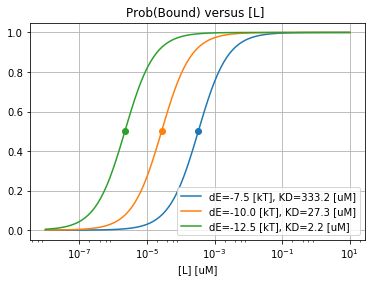

In [45]:
#cs = np.linspace(0,100,100)*1e-6
cs = 10**np.linspace(-8,1,100)
c0 = 0.6 # [M]
kT = 1.  # [kT]

def pb(c,delE):
    c_o_c0 = c/c0
    ex = np.exp(-delE/kT)
    num = c_o_c0 * ex
    den = num+1
    return num/den

from scipy import interpolate
fig, ax = plt.subplots()
p50 = 0.5  
def run(delE, legend=True):
    # get KD  
    L_interp = interpolate.interp1d(pb(cs,delE),cs)
    KD = L_interp(p50)
    

    plt.title('Prob(Bound) versus [L] ')
    plt.xlabel('[L] [uM]')

    plt.plot(cs, pb(cs,delE), label="dE=%3.1f [kT], KD=%3.1f [uM]"% (delE,KD*1e6) )
    plt.scatter(KD,p50)
    plt.xscale('log')
    if legend:
        plt.legend()



delEs = [-7.5,-10,-12.5] # [kT]
for i,delE in enumerate(delEs):
    run(delE,legend=False)
plt.grid()

plt.legend(loc=0)
#plt.gcf().savefig("pBound.png",dpi=300)

In [46]:
#run(-1)

widget-o-fun

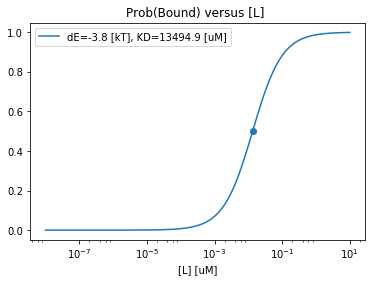

In [47]:
slider = widgets.interact(run, isadaptive=fixed(True),
  delE=widgets.FloatSlider(min=-12,max=0,step=0.2,value=-10,description='delE [kcal/mol]',layout=Layout(width='70%'), continuous_update = True)
            )